In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('DATA_diabetes/diabetes.csv')
print(df.info())

# Kiểm tra giá trị null
print("Nulls")
print(df.isnull().sum())

# Kiểm tra các giá trị 0
print("0s")
print(df.eq(0).sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
Nulls
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                

In [3]:
# Thay thế giá trị 0 trong các cột liên quan với NaN
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0, np.NaN)

# Điền các giá trị NaN bằng trung bình của từng cột
df.fillna(df.mean(), inplace=True)

# Kiểm tra lại xem còn giá trị 0 không
print(df.eq(0).sum())

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [4]:
# Tính toán ma trận tương quan giữa các đặc trưng
corr = df.corr()
print(corr)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.127911       0.208522       0.082989   
Glucose                      0.127911  1.000000       0.218367       0.192991   
BloodPressure                0.208522  0.218367       1.000000       0.192816   
SkinThickness                0.082989  0.192991       0.192816       1.000000   
Insulin                      0.056027  0.420157       0.072517       0.158139   
BMI                          0.021565  0.230941       0.281268       0.542398   
DiabetesPedigreeFunction    -0.033523  0.137060      -0.002763       0.100966   
Age                          0.544341  0.266534       0.324595       0.127872   
Outcome                      0.221898  0.492928       0.166074       0.215299   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies               0.056027  0.021565                 -0.033523   
Glucose                   0.420157  0.230

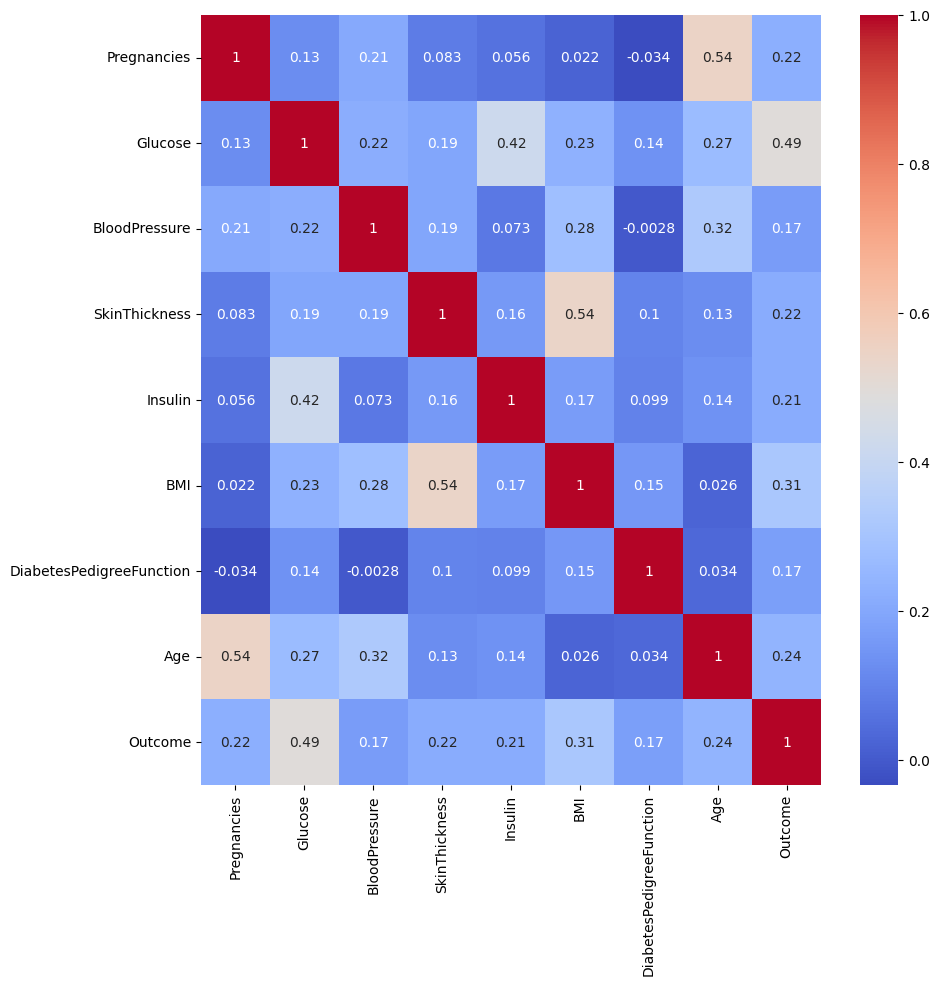

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Vẽ ma trận tương quan sử dụng Seaborn
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

# Hiển thị biểu đồ
plt.show()

In [6]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
import pickle

# Lấy ra các đặc trưng có tương quan cao nhất với Outcome
print(df.corr().nlargest(4, 'Outcome').index)

# Xác định các cột đặc trưng và mục tiêu
features = ['Glucose', 'BMI', 'Age']
X = df[features]
y = df['Outcome']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Khởi tạo danh sách để lưu kết quả
result = []

# Logistic Regression
logistic_regression = LogisticRegression(max_iter=1000)
logistic_regression_score = cross_val_score(logistic_regression, X, y, cv=10, scoring='accuracy').mean()
print("Logistic Regression Accuracy:", logistic_regression_score)
result.append(logistic_regression_score)

# K Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=19)
knn_score = cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean()
print("KNN Accuracy:", knn_score)
result.append(knn_score)

# SVM kernel 'linear'
linear_svm = svm.SVC(kernel='linear')
linear_svm_score = cross_val_score(linear_svm, X, y, cv=10, scoring='accuracy').mean()
print("SVM Linear Kernel Accuracy:", linear_svm_score)
result.append(linear_svm_score)

# SVM kernel 'rbf'
rbf = svm.SVC(kernel='rbf')
rbf_score = cross_val_score(rbf, X, y, cv=10, scoring='accuracy').mean()
print("SVM RBF Kernel Accuracy:", rbf_score)
result.append(rbf_score)

# Chọn thuật toán tốt nhất
algorithms = ["Logistic Regression", "K Nearest Neighbors", "SVM Linear Kernel", "SVM RBF Kernel"]
cv_mean = pd.DataFrame(result, index=algorithms, columns=["Accuracy"])
print(cv_mean.sort_values(by="Accuracy", ascending=False))

# Huấn luyện mô hình KNN (thuật toán tốt nhất)
knn.fit(X, y)

# Lưu mô hình vào đĩa
filename = 'diabetes.sav'
pickle.dump(knn, open(filename, 'wb'))

# Tải mô hình từ đĩa
loaded_model = pickle.load(open(filename, 'rb'))

# Dự đoán với dữ liệu mẫu
Glucose = 65
BMI = 70
Age = 50
sample_data = pd.DataFrame([[Glucose, BMI, Age]], columns=['Glucose', 'BMI', 'Age'])

# Dự đoán và in kết quả
prediction = loaded_model.predict(sample_data)
print(prediction)
if prediction[0] == 0:
    print("Non-diabetic")
else:
    print("Diabetic")

# Xác suất dự đoán
proba = loaded_model.predict_proba(sample_data)
print(proba)
print("Confidence: " + str(round(np.amax(proba[0]) * 100, 2)) + "%")


Index(['Outcome', 'Glucose', 'BMI', 'Age'], dtype='object')
Logistic Regression Accuracy: 0.7669856459330144
KNN Accuracy: 0.7721462747778537
SVM Linear Kernel Accuracy: 0.7656527682843473
SVM RBF Kernel Accuracy: 0.765704032809296
                     Accuracy
K Nearest Neighbors  0.772146
Logistic Regression  0.766986
SVM RBF Kernel       0.765704
SVM Linear Kernel    0.765653
[0]
Non-diabetic
[[0.94736842 0.05263158]]
Confidence: 94.74%


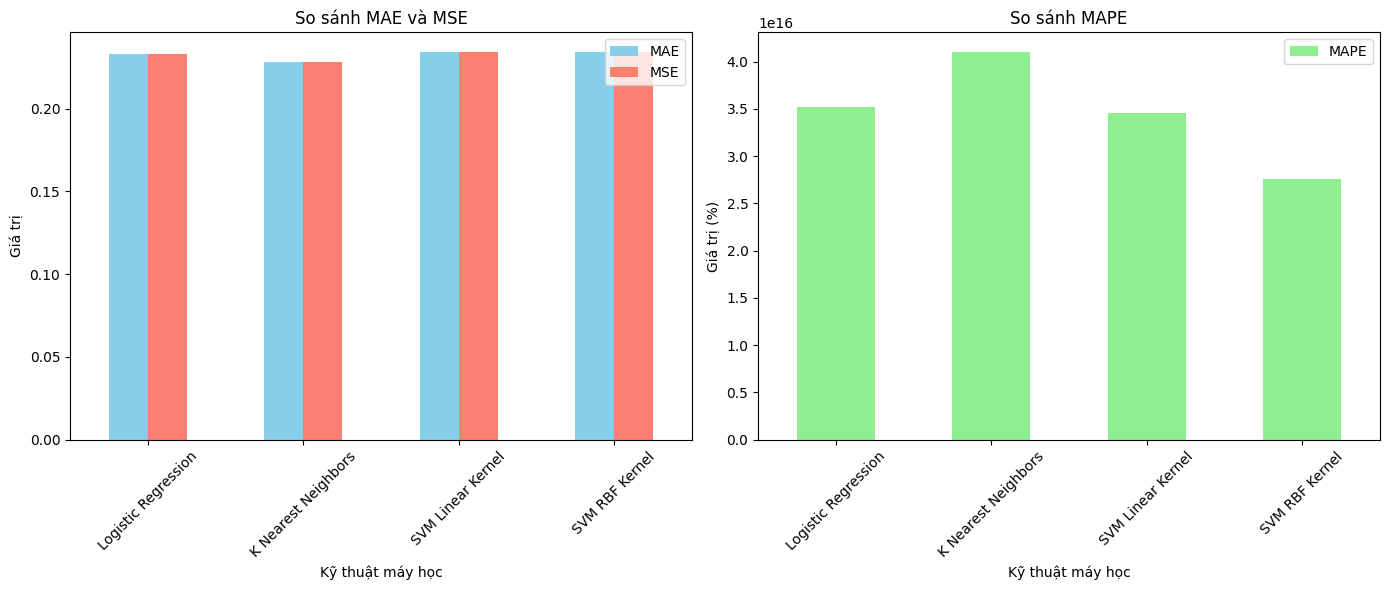

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt

# Tính toán các chỉ số MAE, MSE và MAPE cho các mô hình
def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred) * 100
    return mae, mse, mape

# Dự đoán và tính toán các chỉ số cho mỗi mô hình
metrics = {}

# Logistic Regression
logistic_regression = LogisticRegression(max_iter=1000)
logistic_regression_predictions = cross_val_predict(logistic_regression, X, y, cv=10, method='predict')
metrics['Logistic Regression'] = calculate_metrics(y, logistic_regression_predictions)

# K Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=19)
knn_predictions = cross_val_predict(knn, X, y, cv=10, method='predict')
metrics['K Nearest Neighbors'] = calculate_metrics(y, knn_predictions)

# SVM kernel 'linear'
linear_svm = svm.SVC(kernel='linear', probability=True)
linear_svm_predictions = cross_val_predict(linear_svm, X, y, cv=10, method='predict')
metrics['SVM Linear Kernel'] = calculate_metrics(y, linear_svm_predictions)

# SVM kernel 'rbf'
rbf_svm = svm.SVC(kernel='rbf', probability=True)
rbf_svm_predictions = cross_val_predict(rbf_svm, X, y, cv=10, method='predict')
metrics['SVM RBF Kernel'] = calculate_metrics(y, rbf_svm_predictions)

# Tạo DataFrame để vẽ biểu đồ
metrics_df = pd.DataFrame(metrics, index=['MAE', 'MSE', 'MAPE']).T

# Vẽ biểu đồ MAE và MSE
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

metrics_df[['MAE', 'MSE']].plot(kind='bar', ax=ax[0], color=['skyblue', 'salmon'])
ax[0].set_title('So sánh MAE và MSE')
ax[0].set_ylabel('Giá trị')
ax[0].set_xlabel('Kỹ thuật máy học')
ax[0].set_xticklabels(metrics_df.index, rotation=45)

# Vẽ biểu đồ MAPE
metrics_df[['MAPE']].plot(kind='bar', ax=ax[1], color='lightgreen')
ax[1].set_title('So sánh MAPE')
ax[1].set_ylabel('Giá trị (%)')
ax[1].set_xlabel('Kỹ thuật máy học')
ax[1].set_xticklabels(metrics_df.index, rotation=45)

plt.tight_layout()
plt.show()
